In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('future.no_silent_downcasting', True)

In [2]:
df = pd.read_csv("DA Project Cities.csv")
df = df.drop(columns=["cityname","state"])
df

,Count of Amenities,bathrooms,bedrooms,fee,Pets Yes/NO,price,square_feet,Cost of the City,price/sqft,average_price/sqft_city,devition_avg-price/sqft,Cost sqft of the City
0,0,1.0,1,No,Yes,2195.0,542,High Cost,4.049815,3.638827,0.410989,High Cost
1,0,1.5,3,No,Yes,1250.0,1500,Mid-range Cost,0.833333,1.188008,-0.354675,Low Cost
2,0,2.0,3,No,No,1395.0,1650,Mid-range Cost,0.845455,1.373380,-0.527926,Mid-range Cost
3,0,1.0,2,No,Yes,1600.0,820,High Cost,1.951220,2.059047,-0.107828,High Cost
4,0,1.0,1,No,Yes,975.0,624,Low Cost,1.562500,1.389053,0.173447,Mid-range Cost
...,...,...,...,...,...,...,...,...,...,...,...,...
99385,6,1.0,1,No,No,780.0,605,Mid-range Cost,1.289256,1.301306,-0.012050,Mid-range Cost
99386,13,2.0,2,No,Yes,813.0,921,Mid-range Cost,0.882736,1.329440,-0.446704,Mid-range Cost
99387,2,1.0,1,No,Yes,1325.0,650,High Cost,2.038462,2.732025,-0.693563,High Cost
99388,2,1.0,1,No,Yes,931.0,701,Mid-range Cost,1.328103,1.203260,0.124843,Low Cost


In [3]:
df.describe()

,Count of Amenities,bathrooms,bedrooms,price,square_feet,price/sqft,average_price/sqft_city,devition_avg-price/sqft
count,99390.000000,99390.000000,99390.000000,99390.000000,99390.000000,99390.000000,99390.000000,9.939000e+04
mean,3.671556,1.445608,1.728142,1525.344250,956.386840,1.682401,1.682401,-3.622608e-13
std,3.304251,0.546925,0.748779,887.852956,386.916462,0.846346,0.695648,4.820541e-01
min,0.000000,1.000000,0.000000,100.000000,101.000000,0.047083,0.194219,-4.733335e+00
25%,1.000000,1.000000,1.000000,1014.000000,730.000000,1.120000,1.221158,-2.319310e-01
50%,3.000000,1.000000,2.000000,1350.000000,900.000000,1.469388,1.493840,-3.610956e-02
75%,5.000000,2.000000,2.000000,1795.000000,1115.000000,2.000000,1.931578,1.735570e-01
max,18.000000,9.000000,9.000000,40000.000000,40000.000000,19.038462,9.132420,1.161581e+01


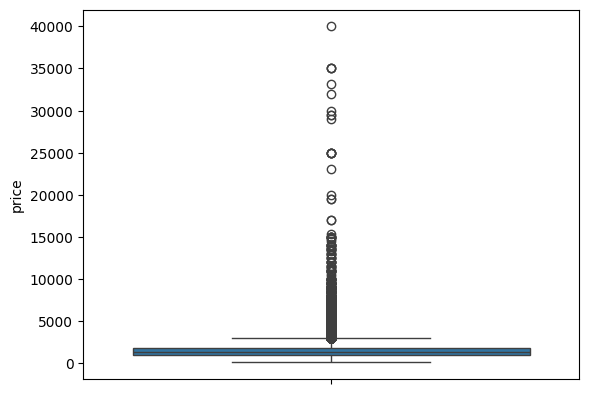

In [4]:
sns.boxplot(data=df, y="price")
plt.show()

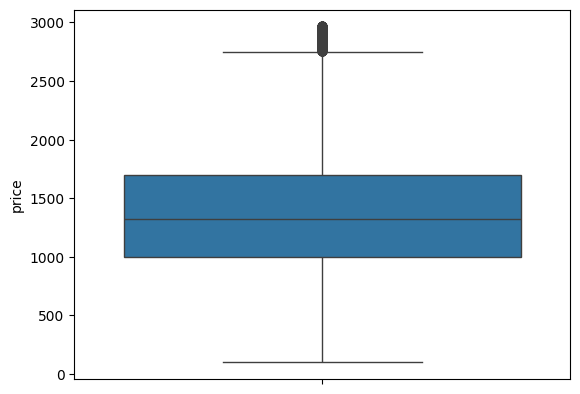

In [5]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop entire rows where 'price' is an outlier
df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)].reset_index(drop=True)

# Plot boxplot
sns.boxplot(data=df, y="price")
plt.show()

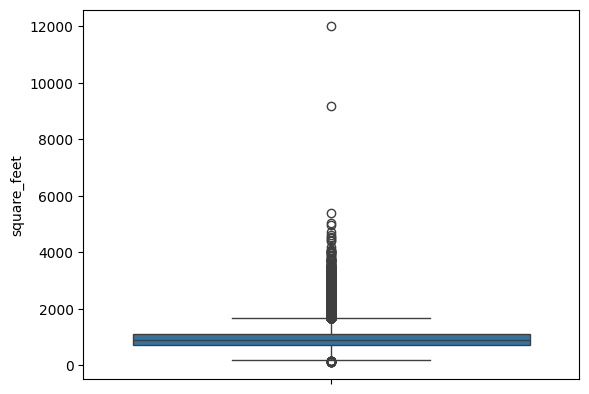

In [6]:
sns.boxplot(data=df, y="square_feet")
plt.show()

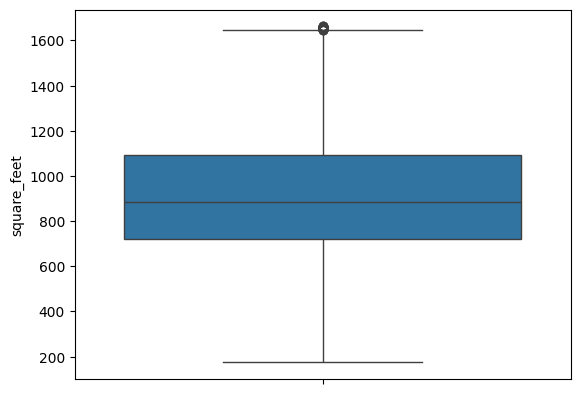

In [7]:
Q1 = df['square_feet'].quantile(0.25)
Q3 = df['square_feet'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop entire rows where 'price' is an outlier
df = df[(df['square_feet'] > lower_bound) & (df['square_feet'] < upper_bound)].reset_index(drop=True)

# Plot boxplot
sns.boxplot(data=df, y="square_feet")
plt.show()

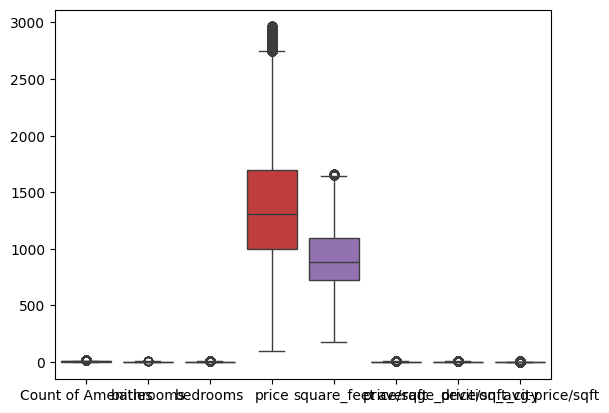

In [8]:
sns.boxplot(data=df)
plt.show()

In [9]:
df['costRange'] = df['Cost of the City'].replace({'Low Cost': 1, 'Mid-range Cost': 2, 'High Cost': 3})

In [10]:
df['costSqrtft'] = df['Cost sqft of the City'].replace({'Low Cost': 1, 'Mid-range Cost': 2, 'High Cost': 3})

In [11]:
df = df.drop(columns="Cost of the City")

In [12]:
df

,Count of Amenities,bathrooms,bedrooms,fee,Pets Yes/NO,price,square_feet,price/sqft,average_price/sqft_city,devition_avg-price/sqft,Cost sqft of the City,costRange,costSqrtft
0,0,1.0,1,No,Yes,2195.0,542,4.049815,3.638827,0.410989,High Cost,3,3
1,0,1.5,3,No,Yes,1250.0,1500,0.833333,1.188008,-0.354675,Low Cost,2,1
2,0,2.0,3,No,No,1395.0,1650,0.845455,1.373380,-0.527926,Mid-range Cost,2,2
3,0,1.0,2,No,Yes,1600.0,820,1.951220,2.059047,-0.107828,High Cost,3,3
4,0,1.0,1,No,Yes,975.0,624,1.562500,1.389053,0.173447,Mid-range Cost,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92520,6,1.0,1,No,No,780.0,605,1.289256,1.301306,-0.012050,Mid-range Cost,2,2
92521,13,2.0,2,No,Yes,813.0,921,0.882736,1.329440,-0.446704,Mid-range Cost,2,2
92522,2,1.0,1,No,Yes,1325.0,650,2.038462,2.732025,-0.693563,High Cost,3,3
92523,2,1.0,1,No,Yes,931.0,701,1.328103,1.203260,0.124843,Low Cost,2,1


In [13]:
df['fee'] = df['fee'].replace({"No": 0, "Yes": 1})
df['allowedPets'] = df['Pets Yes/NO'].replace({"No": 0, "Yes": 1})
df = df.drop(columns="Pets Yes/NO")
df

,Count of Amenities,bathrooms,bedrooms,fee,price,square_feet,price/sqft,average_price/sqft_city,devition_avg-price/sqft,Cost sqft of the City,costRange,costSqrtft,allowedPets
0,0,1.0,1,0,2195.0,542,4.049815,3.638827,0.410989,High Cost,3,3,1
1,0,1.5,3,0,1250.0,1500,0.833333,1.188008,-0.354675,Low Cost,2,1,1
2,0,2.0,3,0,1395.0,1650,0.845455,1.373380,-0.527926,Mid-range Cost,2,2,0
3,0,1.0,2,0,1600.0,820,1.951220,2.059047,-0.107828,High Cost,3,3,1
4,0,1.0,1,0,975.0,624,1.562500,1.389053,0.173447,Mid-range Cost,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92520,6,1.0,1,0,780.0,605,1.289256,1.301306,-0.012050,Mid-range Cost,2,2,0
92521,13,2.0,2,0,813.0,921,0.882736,1.329440,-0.446704,Mid-range Cost,2,2,1
92522,2,1.0,1,0,1325.0,650,2.038462,2.732025,-0.693563,High Cost,3,3,1
92523,2,1.0,1,0,931.0,701,1.328103,1.203260,0.124843,Low Cost,2,1,1


In [14]:
df['std_avg-price/sqft'] = np.sqrt((df['price/sqft'] - df['average_price/sqft_city'])**2)

In [15]:
df = df.drop(columns=['Cost sqft of the City', 'devition_avg-price/sqft'])

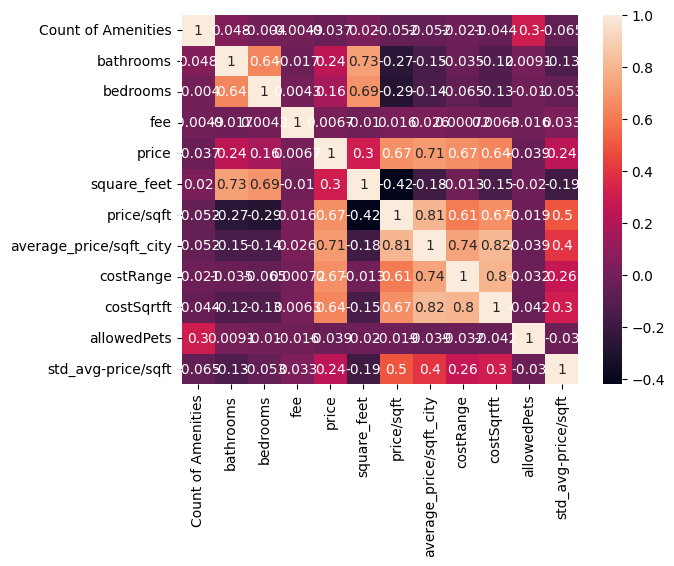

In [16]:
corr = df.corr()

sns.heatmap(corr, annot=True)
plt.show()

In [17]:
# Chia thành 5 bin với biên độ cố định
bins = [0, 600, 1200, 1800, 2400, 3000]  # Chia thành 5 bin đều
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Sử dụng pd.cut để chia cột 'price' thành các bin
df['price_bins'] = pd.cut(df['price'], bins=bins, labels=labels, right=True)

# Mã hóa nhãn thành giá trị số
df['price_bins'] = pd.Categorical(df['price_bins']).codes
df

,Count of Amenities,bathrooms,bedrooms,fee,price,square_feet,price/sqft,average_price/sqft_city,costRange,costSqrtft,allowedPets,std_avg-price/sqft,price_bins
0,0,1.0,1,0,2195.0,542,4.049815,3.638827,3,3,1,0.410989,3
1,0,1.5,3,0,1250.0,1500,0.833333,1.188008,2,1,1,0.354675,2
2,0,2.0,3,0,1395.0,1650,0.845455,1.373380,2,2,0,0.527926,2
3,0,1.0,2,0,1600.0,820,1.951220,2.059047,3,3,1,0.107828,2
4,0,1.0,1,0,975.0,624,1.562500,1.389053,1,2,1,0.173447,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92520,6,1.0,1,0,780.0,605,1.289256,1.301306,2,2,0,0.012050,1
92521,13,2.0,2,0,813.0,921,0.882736,1.329440,2,2,1,0.446704,1
92522,2,1.0,1,0,1325.0,650,2.038462,2.732025,3,3,1,0.693563,2
92523,2,1.0,1,0,931.0,701,1.328103,1.203260,2,1,1,0.124843,1


In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming regression_df is your DataFrame and contains only numeric columns
scaler = StandardScaler()

# Fit and transform the data while keeping the column labels
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame and assign the original column names
trained_df = pd.DataFrame(scaled_data, columns=df.columns)

# Display the scaled DataFrame
trained_df

,Count of Amenities,bathrooms,bedrooms,fee,price,square_feet,price/sqft,average_price/sqft_city,costRange,costSqrtft,allowedPets,std_avg-price/sqft,price_bins
0,-1.122822,-0.799969,-0.983353,-0.040565,1.536910,-1.443309,3.410011,3.382088,1.157334,1.272606,1.228947,0.399766,1.315050
1,-1.122822,0.200438,1.972233,-0.040565,-0.270038,2.335197,-1.097339,-0.720720,-0.335831,-1.401841,1.228947,0.219349,0.205423
2,-1.122822,1.200845,1.972233,-0.040565,0.007219,2.926821,-1.080354,-0.410397,-0.335831,-0.064617,-0.813705,0.774402,0.205423
3,-1.122822,-0.799969,0.494440,-0.040565,0.399202,-0.346832,0.469187,0.737448,1.157334,1.272606,1.228947,-0.571488,0.205423
4,-1.122822,-0.799969,-0.983353,-0.040565,-0.795869,-1.119888,-0.075537,-0.384160,-1.828996,-0.064617,1.228947,-0.361260,-0.904203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92520,0.680772,-0.799969,-0.983353,-0.040565,-1.168732,-1.194827,-0.458441,-0.531053,-0.335831,-0.064617,-0.813705,-0.878338,-0.904203
92521,2.784964,1.200845,0.494440,-0.040565,-1.105632,0.051528,-1.028110,-0.483955,-0.335831,-0.064617,1.228947,0.514188,-0.904203
92522,-0.521624,-0.799969,-0.983353,-0.040565,-0.126629,-1.017340,0.591442,1.864051,1.157334,1.272606,1.228947,1.305066,0.205423
92523,-0.521624,-0.799969,-0.983353,-0.040565,-0.880002,-0.816187,-0.404005,-0.695188,-0.335831,-1.401841,1.228947,-0.516975,-0.904203


In [18]:
from sklearn.model_selection import train_test_split
y = trained_df['price_bins']
X = trained_df.drop(columns=['price_bins','price', 'price/sqft', 'average_price/sqft_city'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

NameError: name 'trained_df' is not defined

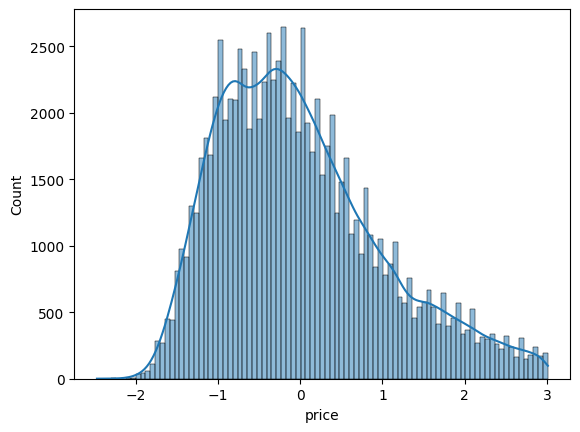

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=trained_df, x="price", kde=True)
plt.show()

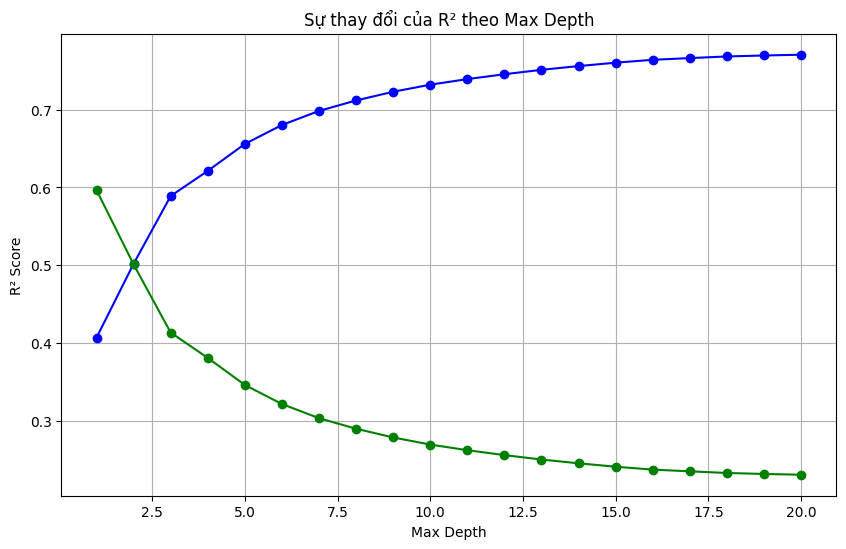

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_scores = []
mean_squared_error_scores = []
for depth in range(1, 21):
# Khởi tạo và huấn luyện mô hình hồi quy
    random_model = RandomForestRegressor(max_depth=depth, random_state=0)
    random_model.fit(X_train, y_train)
    
    # Dự đoán trên bộ kiểm tra
    random_y_pred = random_model.predict(X_test)
    
    # Kiểm tra độ chính xác của mô hình (R² score)
    r2 = r2_score(y_test, random_y_pred)
    mse_score  = mean_squared_error(y_test, random_y_pred)
    r2_scores.append(r2)
    mean_squared_error_scores.append(mse_score)
# Vẽ đồ thị R² theo max_depth
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), r2_scores, marker='o', linestyle='-', color='b')
plt.plot(range(1, 21), mean_squared_error_scores, marker='o', linestyle='-', color='green')
plt.title("Sự thay đổi của R² theo Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

k = [1, 2, 3, 4]
r2_list = []
rmse_list = []

def poly_regression():
    for i in k:
        # Create polynomial features of degree i
        poly_model = PolynomialFeatures(i)
        
        # Transform the features (X_train) into polynomial features
        X_poly_train = poly_model.fit_transform(X_train)
        
        # Fit a linear regression model on the polynomial features
        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        
        # Transform the X_test data into polynomial features using the same transformer
        X_poly_test = poly_model.transform(X_test)
        
        # Make predictions on the test data
        y_pred = model.predict(X_poly_test)
        
        # Calculate R-squared (r²) for the test set
        r2 = r2_score(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        r2_list.append(r2)
        rmse_list.append(rmse)
        print(f"Degree {i} Polynomial - R²: {r2} - RMSE: {rmse}")
    return r2_list

In [21]:
r2_list = poly_regression()

Degree 1 Polynomial - R²: 0.6274459094933914 - RMSE: 0.612157548322598
Degree 2 Polynomial - R²: 0.6724450443175416 - RMSE: 0.5739983290430866
Degree 3 Polynomial - R²: 0.68374017691423 - RMSE: 0.5640148682446104
Degree 4 Polynomial - R²: -6.497252616485584 - RMSE: 2.7461206451788693


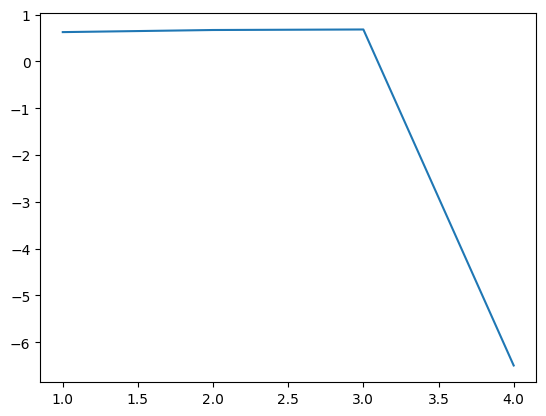

In [22]:


sns.lineplot(x=k, y=r2_list)
plt.show()

## Gradient Descent

In [23]:
print("train:", X_train.shape)
print("test:",X_test.shape)

train: (74020, 9)
test: (18505, 9)


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử X_train, y_train, X_test và y_test đã được định nghĩa trước
num_samples, num_features = X_train.shape
learning_rate = [0.009, 0.01, 0.05, 0.08]
num_epochs = 100

def loss_function(y_actual, y_pred, n_samples):
    mse = np.sqrt(np.sum((y_actual - y_pred)**2)) / n_samples
    return mse

def gradient(y_actual, y_pred, n_samples, x):
    return -2 / n_samples * np.dot(x.T, (y_actual - y_pred))

def gradient_intercept(y_actual, y_pred, n_samples):
    return -2 / n_samples * np.sum((y_actual - y_pred))

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - ss_residual / ss_total

# Để lưu RMSE


rmse_train_all = []
rmse_test_all = []
r2_test_all = []

for i in learning_rate:
    weight = np.random.rand(num_features)  # Reset weight mỗi lần
    intercept = 0
    rmse_train_list = []
    rmse_test_list = []
    r2_test_list = []

    for epoch in range(num_epochs):
        y_pred_train = np.dot(X_train, weight) + intercept

        grad_x = gradient(y_train, y_pred_train, num_samples, X_train)
        grad_b = gradient_intercept(y_train, y_pred_train, num_samples)

        weight -= i * grad_x
        intercept -= i * grad_b

        epoch_rmse_train = loss_function(y_train, y_pred_train, num_samples)
        y_pred_test = np.dot(X_test, weight) + intercept
        epoch_rmse_test = loss_function(y_test, y_pred_test, len(y_test))
        epoch_r2_test = r2_score(y_test, y_pred_test)

        rmse_train_list.append(epoch_rmse_train)
        rmse_test_list.append(epoch_rmse_test)
        r2_test_list.append(epoch_r2_test)

        print(f"Epoch {epoch} - RMSE Train: {epoch_rmse_train:.4f}, RMSE Test: {epoch_rmse_test:.4f}, R² Test: {epoch_r2_test:.4f}")

    # Lưu từng learning rate vào danh sách tổng
    rmse_train_all.append((i, rmse_train_list))
    rmse_test_all.append((i, rmse_test_list))
    r2_test_all.append((i, r2_test_list))


Epoch 0 - RMSE Train: 0.0040, RMSE Test: 0.0077, R² Test: -0.0996
Epoch 1 - RMSE Train: 0.0039, RMSE Test: 0.0076, R² Test: -0.0546
Epoch 2 - RMSE Train: 0.0038, RMSE Test: 0.0074, R² Test: -0.0127
Epoch 3 - RMSE Train: 0.0037, RMSE Test: 0.0073, R² Test: 0.0263
Epoch 4 - RMSE Train: 0.0036, RMSE Test: 0.0071, R² Test: 0.0626
Epoch 5 - RMSE Train: 0.0036, RMSE Test: 0.0070, R² Test: 0.0965
Epoch 6 - RMSE Train: 0.0035, RMSE Test: 0.0069, R² Test: 0.1280
Epoch 7 - RMSE Train: 0.0035, RMSE Test: 0.0068, R² Test: 0.1574
Epoch 8 - RMSE Train: 0.0034, RMSE Test: 0.0067, R² Test: 0.1849
Epoch 9 - RMSE Train: 0.0033, RMSE Test: 0.0066, R² Test: 0.2105
Epoch 10 - RMSE Train: 0.0033, RMSE Test: 0.0065, R² Test: 0.2344
Epoch 11 - RMSE Train: 0.0032, RMSE Test: 0.0064, R² Test: 0.2567
Epoch 12 - RMSE Train: 0.0032, RMSE Test: 0.0063, R² Test: 0.2775
Epoch 13 - RMSE Train: 0.0031, RMSE Test: 0.0062, R² Test: 0.2970
Epoch 14 - RMSE Train: 0.0031, RMSE Test: 0.0061, R² Test: 0.3152
Epoch 15 - RMSE T

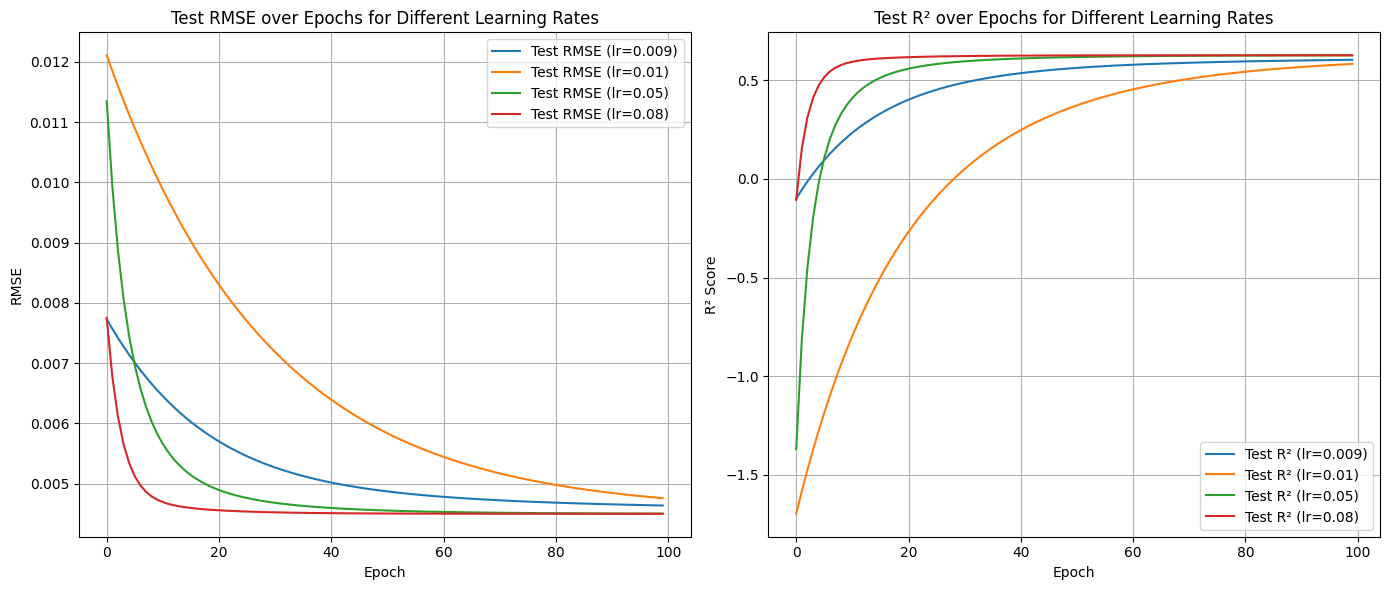

In [25]:
plt.figure(figsize=(14, 6))

# --- RMSE ---
plt.subplot(1, 2, 1)
for lr, rmse_list in rmse_test_all:
    plt.plot(rmse_list, label=f'Test RMSE (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Test RMSE over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)

# --- R² ---
plt.subplot(1, 2, 2)
for lr, r2_list in r2_test_all:
    plt.plot(r2_list, label=f'Test R² (lr={lr})')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.title('Test R² over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
y = df['price_bins']
X = df.drop(columns=['price_bins','price', 'price/sqft', 'average_price/sqft_city'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import LabelEncoder

for col in ['fee', 'costRange', 'costSqrtft', 'allowedPets']:
    df[col] = df[col].astype(str)  # Phòng khi có NaN
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

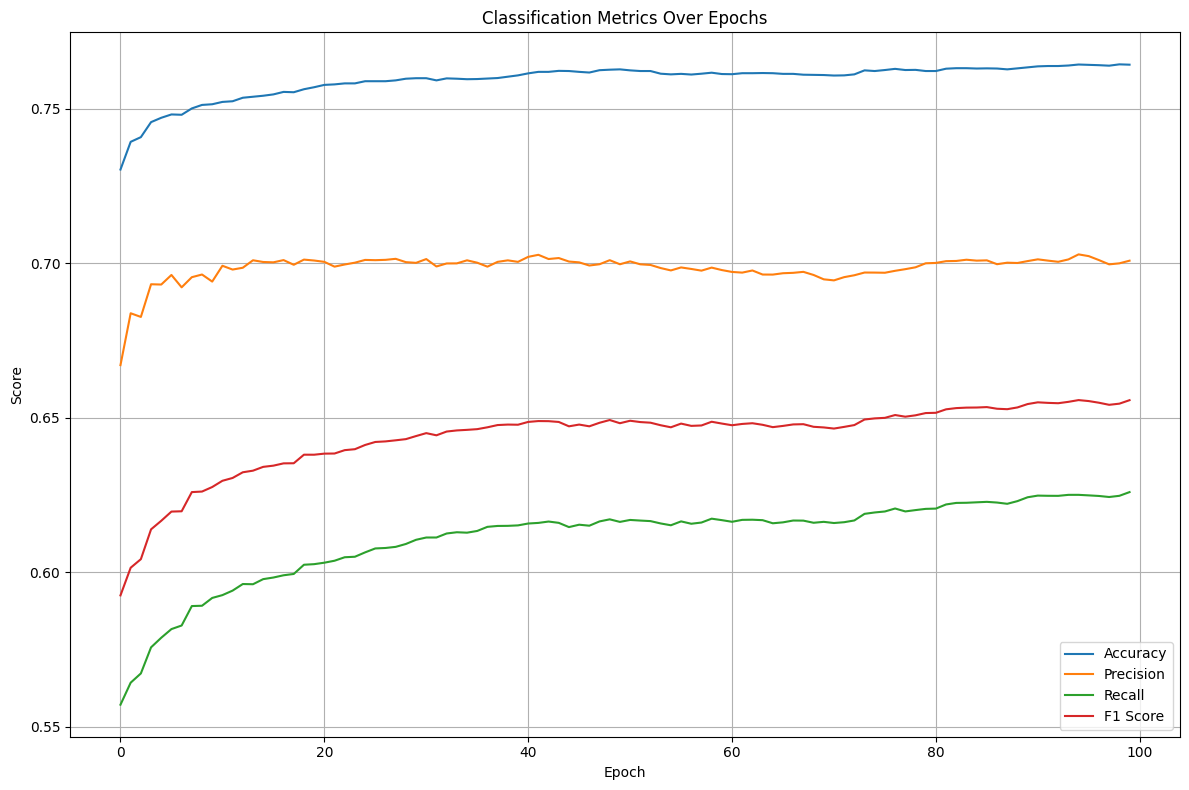

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Thông số
num_class = len(np.unique(y_train))
param = {
    'max_depth': 15,
    'eta': 0.2,
    'objective': 'multi:softprob',
    'num_class': num_class,
    'eval_metric': 'mlogloss',
    'nthread': 4
}

# Theo dõi quá trình huấn luyện
evals_result = {}
epochs = 100
eval_metric_train = []
eval_metric_test = []
acc_list = []
prec_list = []
rec_list = []
f1_list = []

bst = None

for i in range(epochs):
    bst = xgb.train(
        params=param,
        dtrain=dtrain,
        num_boost_round=1,
        xgb_model=bst,
        evals=[(dtest, 'eval'), (dtrain, 'train')],
        evals_result=evals_result,
        verbose_eval=False
    )
    
    # Dự đoán xác suất → chuyển thành nhãn
    y_pred_prob = bst.predict(dtest)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Tính các chỉ số
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

# 🎯 Vẽ biểu đồ các chỉ số
plt.figure(figsize=(12, 8))
plt.plot(acc_list, label='Accuracy')
plt.plot(prec_list, label='Precision')
plt.plot(rec_list, label='Recall')
plt.plot(f1_list, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Classification Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


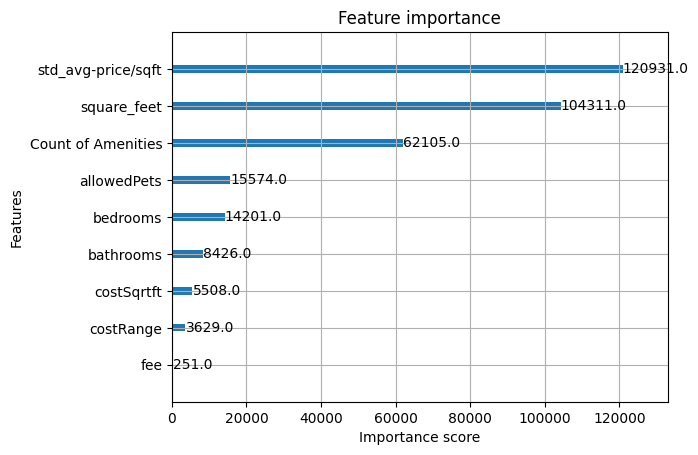

In [51]:
import matplotlib.pyplot as plt
xgb.plot_importance(bst, max_num_features=10)
plt.show()

In [44]:
df['price_bins'].value_counts(normalize=True) * 100

price_bins
1    39.144015
2    38.587409
3    14.524723
4     5.398541
0     2.345312
Name: proportion, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu huấn luyện và kiểm tra
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Tham số để tìm kiếm
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

# Khởi tạo mô hình SVC
svc = SVC(class_weight='balanced')

# GridSearchCV tìm bộ tham số tối ưu
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# In ra bộ tham số tối ưu
print(f"Best Parameters: {grid_search.best_params_}")

# Dự đoán và tính toán các metrics với mô hình đã được tối ưu
y_pred = grid_search.predict(X_test_scaled)

# Tính các metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# In kết quả
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")